In [3]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa


In [ ]:

# creation of data
N = 500
x = np.random.normal(0, 1, (N, 4)) # input matrix
v = np.random.normal(0, 0.1, N) # noise
d = 2*x[:,0] + 0.1*x[:,1] - 4*x[:,2] + 0.5*x[:,3] + v # target

# identification
f = pa.filters.FilterLMS(n=4, mu=0.1, w="random")
y, e, w = f.run(d, x)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output")
plt.legend()
# plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
# plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
# plt.tight_layout()
plt.show()

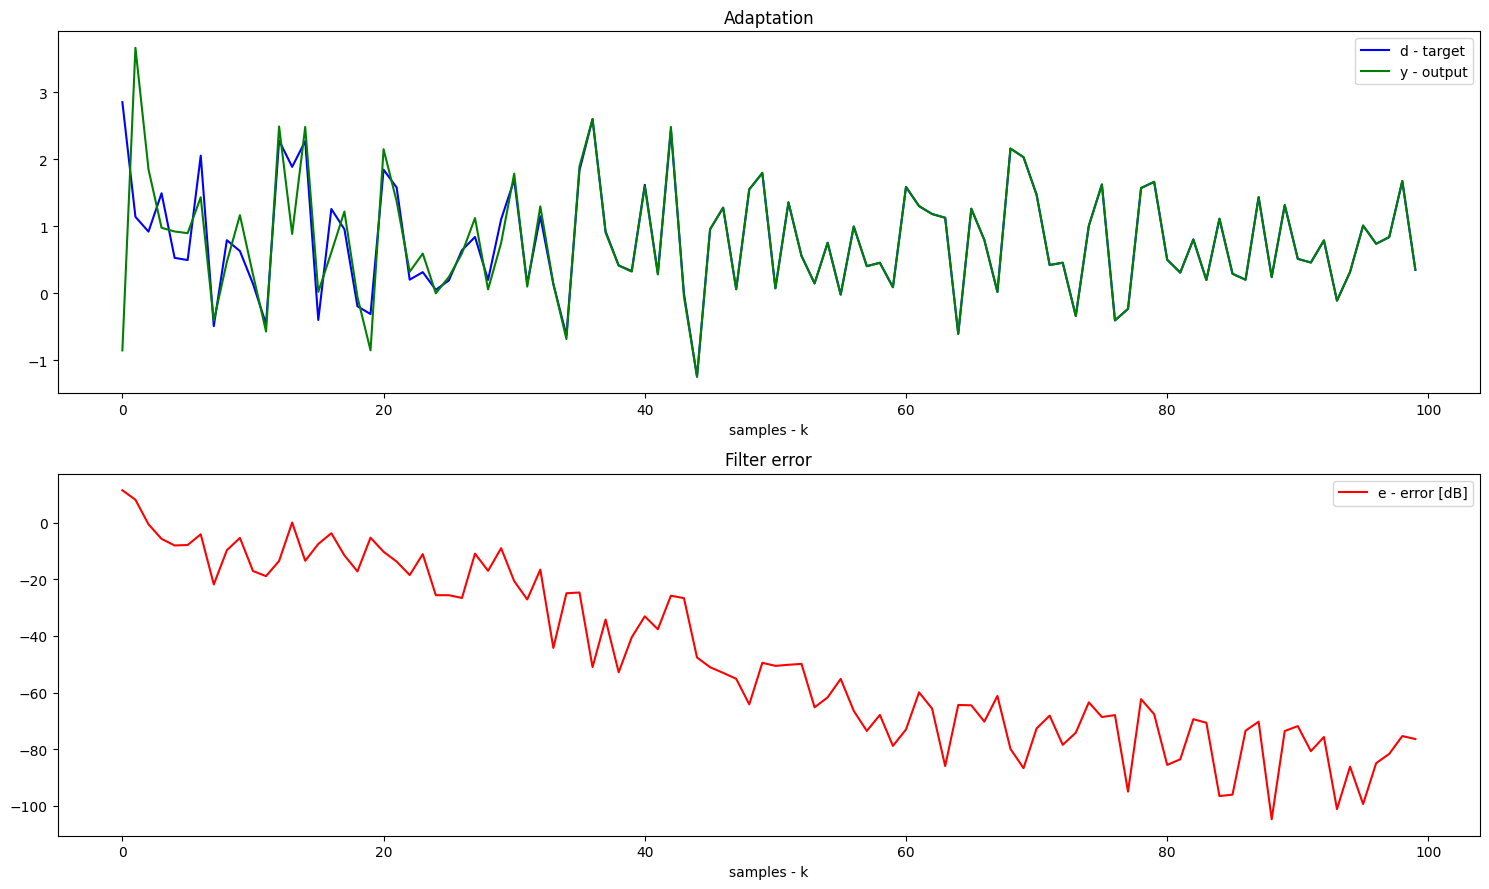

In [9]:
# these two function supplement your online measurment
def measure_x():
    # it produces input vector of size 3
    x = np.random.random(3)
    return x

def measure_d(x):
    # meausure system output
    d = 2*x[0] + 1*x[1] - 1.5*x[2]
    return d

N = 100
log_d = np.zeros(N)
log_y = np.zeros(N)
filt = pa.filters.FilterLMS(3, mu=1.)
for k in range(N):
    # measure input
    x = measure_x()
    # predict new value
    y = filt.predict(x)
    # do the important stuff with prediction output
    pass
    # measure output
    d = measure_d(x)
    # update filter
    filt.adapt(d, x)
    # log values
    log_d[k] = d
    log_y[k] = y

### show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(log_d,"b", label="d - target")
plt.plot(log_y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10((log_d-log_y)**2),"r", label="e - error [dB]")
plt.legend(); plt.tight_layout(); plt.show()